In [6]:
# Veg CO validate
# read thru and combine with run summary
#build a pipeline to assemble all the images
#Amazon S3/planet-snowcover-experiments/planet-snowcover-2020-04-17-16-32-32-656
import pprint
import s3fs
import boto3
import io
from re import match
%matplotlib inline
import rasterio as rio

p = pprint.PrettyPrinter()

fs = s3fs.S3FileSystem(session = boto3.Session(profile_name = 'esip'))
#dem only
imagery_searchpath = 's3://planet-snowcover-analysis/planet-snowcover-2020-03-01-13-37-37-330/'
#print("Searching for imagery...({})".format(imagery_searchpath))
imagery_candidates = fs.ls(imagery_searchpath)
print("candidates:")
#p.pprint(imagery_candidates)
# filter only the test scenes tiles
clipped_scenes = [link for link  in imagery_candidates if 'planet-snowcover-imagery-veg:20180524' in link]
p.pprint(clipped_scenes)

candidates:
['planet-snowcover-analysis/planet-snowcover-2020-03-01-13-37-37-330/planet-snowcover-imagery-veg:20180524_172141_103d_3B_AnalyticMS_SR_clip',
 'planet-snowcover-analysis/planet-snowcover-2020-03-01-13-37-37-330/planet-snowcover-imagery-veg:20180524_172142_103d_3B_AnalyticMS_SR_clip',
 'planet-snowcover-analysis/planet-snowcover-2020-03-01-13-37-37-330/planet-snowcover-imagery-veg:20180524_172143_103d_3B_AnalyticMS_SR_clip',
 'planet-snowcover-analysis/planet-snowcover-2020-03-01-13-37-37-330/planet-snowcover-imagery-veg:20180524_172144_103d_3B_AnalyticMS_SR_clip',
 'planet-snowcover-analysis/planet-snowcover-2020-03-01-13-37-37-330/planet-snowcover-imagery-veg:20180524_172145_103d_3B_AnalyticMS_SR_clip',
 'planet-snowcover-analysis/planet-snowcover-2020-03-01-13-37-37-330/planet-snowcover-imagery-veg:20180524_172146_103d_3B_AnalyticMS_SR_clip',
 'planet-snowcover-analysis/planet-snowcover-2020-03-01-13-37-37-330/planet-snowcover-imagery-veg:20180524_172147_103d_3B_Analytic

In [8]:
import os
os.chdir('/home/ubuntu/planet-snowcover/experiments/ASO_Tuolumne/scripts')
for link in clipped_scenes:
    !python summarize.py --aws_profile esip {link} ~/veg-co-validate --mask_loc planet-snowcover-snow/ASO_3M_SD_USCOGE_20180524_binary 


Imagepath: planet-snowcover-imagery-veg/20180524_172141_103d_3B_AnalyticMS_SR_clip
28 935
No overlapping tiles. Double-check mask path.
Imagepath: planet-snowcover-imagery-veg/20180524_172142_103d_3B_AnalyticMS_SR_clip
188 935
100%|█████████████████████████████████████████████| 3/3 [00:00<00:00,  5.57it/s]
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
Imagepath: planet-snowcover-imagery-veg/20180524_172143_103d_3B_AnalyticMS_SR_clip
195 935
100%|███████████████████████████████████████████| 87/87 [00:14<00:00,  5.85it/s]
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
Imagepath: planet-snowcover-imagery-veg/20180524_172144_103d_3B_AnalyticMS_SR_clip
47 935
100%|███████████████████████████████████████████| 47/47 [00:08<00:00,  5.85it/s]
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...

In [24]:
ls -l

total 5500
-rw-rw-r-- 1 ubuntu ubuntu    2259 Mar  5 04:36 aftertrain.py
-rw-rw-r-- 1 ubuntu ubuntu    7409 Feb 27 23:33 compare.py
-rw-rw-r-- 1 ubuntu ubuntu    3952 Feb 27 23:33 get-modis.py
-rw-rw-r-- 1 ubuntu ubuntu    8868 Feb 27 23:33 get_sentinel.py
-rw-rw-r-- 1 ubuntu ubuntu     680 Mar 12 14:42 output.log
-rw-rw-r-- 1 ubuntu ubuntu    1673 Mar  5 04:42 output_summarize_veg.log
-rw-rw-r-- 1 ubuntu ubuntu  314434 Mar 18 05:36 prediction_base_test_only.log
-rw-rw-r-- 1 ubuntu ubuntu 2332511 Mar 13 03:04 prediction_veg_dem_job.log
-rw-rw-r-- 1 ubuntu ubuntu  332866 Mar 18 05:32 prediction_veg_dem_job_test.log
-rw-rw-r-- 1 ubuntu ubuntu 2265075 Mar 13 08:08 prediction_veg_job.log
-rw-rw-r-- 1 ubuntu ubuntu  319397 Mar 18 05:25 prediction_veg_job_test_only.log
-rw-rw-r-- 1 ubuntu ubuntu    3738 Mar 12 17:20 run_prediction.py
-rw-rw-r-- 1 ubuntu ubuntu    2737 Feb 27 23:33 sagetrain.py
-rw-rw-r-- 1 ubuntu ubuntu    6068 Mar  5 04:36 summarize.py


In [3]:
# Run metrics

In [5]:
import os
from glob import glob
import pandas as pd 
import matplotlib.pyplot as plt

resultRoot = "/home/ubuntu/veg-validate/"

In [6]:
results = glob(os.path.join(resultRoot, "*/*/*_merged.tif"))

In [7]:
results

['/home/ubuntu/veg-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20190705_182534_0f17_3B_AnalyticMS_SR/preds/20190705_182534_0f17_3B_AnalyticMS_SR_merged.tif',
 '/home/ubuntu/veg-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20190705_182534_0f17_3B_AnalyticMS_SR/mask/ASO_3M_SD_USCATE_20190705_4326_binary_merged.tif',
 '/home/ubuntu/veg-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20190705_182425_0f28_3B_AnalyticMS_SR/preds/20190705_182425_0f28_3B_AnalyticMS_SR_merged.tif',
 '/home/ubuntu/veg-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20190705_182425_0f28_3B_AnalyticMS_SR/mask/ASO_3M_SD_USCATE_20190705_4326_binary_merged.tif',
 '/home/ubuntu/veg-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20

/home/ubuntu/veg-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20190705_182534_0f17_3B_AnalyticMS_SR/preds/20190705_182534_0f17_3B_AnalyticMS_SR_merged.tif
[[   0    0    0 ... 9999 9999 9999]
 [   0    0    0 ... 9999 9999 9999]
 [   0    0    0 ... 9999 9999 9999]
 ...
 [9999 9999 9999 ... 9999 9999 9999]
 [9999 9999 9999 ... 9999 9999 9999]
 [9999 9999 9999 ... 9999 9999 9999]]


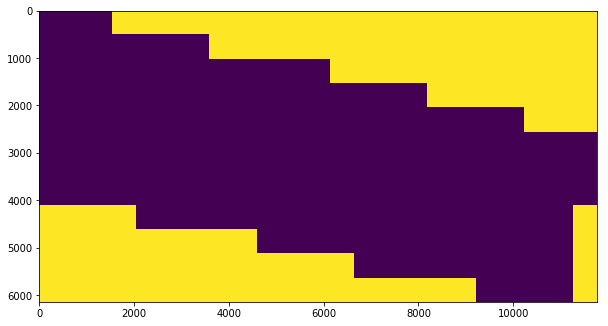

In [8]:
%matplotlib inline
import rasterio as rio
import numpy as np
from matplotlib import pyplot as plt
import rasterio.plot
import os
from datetime import datetime as dt
print(results[0])
# Load the DEM and read out a np array of the elevation values (meters):
dem = rio.open(results[0])
elev = dem.read(1)
print(elev)


# Plot this elevation band:
plt.figure(figsize=(10,10))
plt.imshow(elev)

title_text = ''
plt.title(title_text);

/home/ubuntu/veg-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20190705_182534_0f17_3B_AnalyticMS_SR/mask/ASO_3M_SD_USCATE_20190705_4326_binary_merged.tif
[[   0    0    0 ... 9999 9999 9999]
 [   0    0    0 ... 9999 9999 9999]
 [   0    0    0 ... 9999 9999 9999]
 ...
 [9999 9999 9999 ... 9999 9999 9999]
 [9999 9999 9999 ... 9999 9999 9999]
 [9999 9999 9999 ... 9999 9999 9999]]


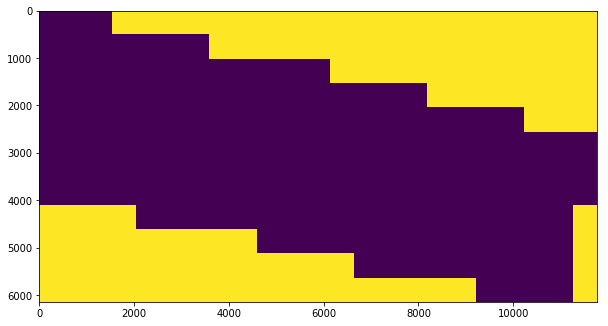

In [12]:
# Load the DEM and read out a np array of the elevation values (meters):
print(results[1])
dem = rio.open(results[1])
elev = dem.read(1)
print(elev)


# Plot this elevation band:
plt.figure(figsize=(10,10))
plt.imshow(elev)

title_text = ''
plt.title(title_text);

In [58]:
from osgeo import gdal
def match_extent(small,large):

    # given that a geotransform object is in this form:
    #adfGeoTransform[0] /* top left x */
    #adfGeoTransform[1] /* w-e pixel resolution */
    #adfGeoTransform[2] /* 0 */
    #adfGeoTransform[3] /* top left y */
    #adfGeoTransform[4] /* 0 */
    #adfGeoTransform[5] /* n-s pixel resolution (negative value) */

    smaller_raster = gdal.Open(small)
    larger_raster  = gdal.Open(large)
    
    gt = smaller_raster.GetGeoTransform()
    lt = larger_raster.GetGeoTransform()

    SmlMaxX = gt[0] + (gt[1] * smaller_raster.RasterXSize)
    SmlMinY = gt[3] + (gt[5] * smaller_raster.RasterYSize)
    
    Xoff = int((gt[0] - lt[0])/lt[1]) # cols to skip
    Yoff = int((gt[3] - lt[3])/lt[5]) # rows to skip
    
    # Modified to take resolution of the smaller raster
    Cols = int((SmlMaxX - gt[0])/lt[1])
    print("gt0 {}, lt1 {}".format(gt[0],lt[1]))
    print("gt0 {}, gt1 {}".format(gt[0],gt[1]))
    # Modified to take resolution of the smaller raster
    Rows = int((SmlMinY - gt[3])/lt[5])
    print("gt3 {}, lt5 {}".format(gt[3],lt[5]))
    print("gt3 {}, gt5 {}".format(gt[3],gt[5]))
    
    # print out some numbers so you can check manually
    print("X offset {}, Y offset {}".format(Xoff,Yoff))
    print("Xmax {}, Ymin {}".format(SmlMaxX,SmlMinY))
    print("Reading {} cols, {} rows".format(Cols,Rows))

    band = larger_raster.GetRasterBand(1)
    data = larger_raster.ReadAsArray(Xoff,Yoff,Cols,Rows) # read the larger raster 
    return data

In [18]:
from glob import glob
from sklearn import metrics
import json
def compute_metrics(true, pred):
    print(true.shape, pred.shape)
    assert true.shape == pred.shape, "Masks and predictions are different shapes. Are you sure they're in the same CRS/extent?"

    compare = (true, pred)

    balanced_acc = metrics.balanced_accuracy_score(*compare)
    prfs = metrics.precision_recall_fscore_support(*compare, average='binary')

    these_metrics = {
        "balanced_accuracy" : balanced_acc,
        "precision": prfs[0],
        "recall": prfs[1],
        "f_score": prfs[2]
    }

    return these_metrics


In [36]:
def prediction(directory, plot, mask_dir):
    """
    Compare ASO in <directory> to predictions found in <directory>.

    Looks for *merged.tif files.
    """

    dirfiles = os.listdir(directory)
    assert mask_dir in dirfiles, f"Mask directory '{mask_dir}' not found in {directory}"
    assert "preds" in dirfiles, f"Prediction directory not found in {directory}"

    mask_file = glob(os.path.join(directory, mask_dir, "*merged*.tif"))[0]
    print('mask file - ',mask_file)
    mask = rio.open(mask_file)
    print(mask.nodata)

    preds_file = glob(os.path.join(directory, "preds", "*merged*.tif"))[0]
    print('pred file - ',preds_file)
    preds = rio.open(preds_file)
    print(preds.nodata)

    print(mask.crs, preds.crs)
    mask_data = mask.read(1).flatten()
    pred_data = preds.read(1).flatten()
    print(mask_data.shape, pred_data.shape)
    # remove nodata
    try:
        mask_data = mask_data[np.where(mask_data != mask.nodata)]
        pred_data = pred_data[np.where(pred_data != preds.nodata)]
    except Exception as e:
        print("Error filtering nodata. Do input data files have nodata attribute set? [{}]".format(e))
        sys.exit(1)
    print(mask_data.shape, pred_data.shape)
    if not (mask_data.shape==pred_data.shape):
        if mask_data.shape < pred_data.shape:
            print('pred greater')
            pred_r = match_extent(mask_file,preds_file).ravel()
            print(type(pred_r))
            mask_data = mask_data
            pred_data = pred_r.flatten()
            pred_data = pred_data[np.where(pred_data != preds.nodata)]
            print('after transform pred greater',mask_data.shape, pred_data.shape)
        elif mask_data.shape > pred_data.shape:  
            print('mask greater')
            mask_r = match_extent(preds_file,mask_file).ravel()
            print(type(mask_r))
            pred_data = pred_data
            mask_data = mask_r.flatten()  
            mask_data = mask_data[np.where(mask_data != mask.nodata)]  
            print('after transform mask greater',mask_data.shape, pred_data.shape)
 
 
        #mask_data = mask_data[np.where(mask_data != mask.nodata)]
        #pred_data = pred_data[np.where(pred_data != preds.nodata)]
        print(mask_data.shape, pred_data.shape)
        #mask = reproject_like_vrt(mask, preds)
        
    metrics = compute_metrics(mask_data, pred_data)

    results = {
        "mask": mask_file,
        "preds": preds_file,
        "metrics" : metrics
    }
    print(results)
    outfile = os.path.join(directory, "aso_metrics.json")
    with open(outfile, 'w') as o:
        json.dump(results, o)


In [15]:
results_dirs = glob(os.path.join(resultRoot, "*"))

In [16]:
results_dirs

['/home/ubuntu/veg-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20190705_182534_0f17_3B_AnalyticMS_SR',
 '/home/ubuntu/veg-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20190705_182425_0f28_3B_AnalyticMS_SR',
 '/home/ubuntu/veg-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20190705_171624_0f49_3B_AnalyticMS_SR',
 '/home/ubuntu/veg-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20190705_182422_0f28_3B_AnalyticMS_SR',
 '/home/ubuntu/veg-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20190705_182533_0f17_3B_AnalyticMS_SR',
 '/home/ubuntu/veg-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20190705_182421_0f28_3B_AnalyticMS_SR',
 '/home/ubuntu/v

In [53]:
for path in results_dirs:
    prediction(path,'','mask')

mask file -  /home/ubuntu/veg-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20190705_182534_0f17_3B_AnalyticMS_SR/mask/ASO_3M_SD_USCATE_20190705_4326_binary_merged.tif
9999.0
pred file -  /home/ubuntu/veg-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20190705_182534_0f17_3B_AnalyticMS_SR/preds/20190705_182534_0f17_3B_AnalyticMS_SR_merged.tif
9999.0
EPSG:4326 EPSG:4326
(72351744,) (72351744,)
(44828672,) (44828672,)
(44828672,) (44828672,)
{'mask': '/home/ubuntu/veg-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20190705_182534_0f17_3B_AnalyticMS_SR/mask/ASO_3M_SD_USCATE_20190705_4326_binary_merged.tif', 'preds': '/home/ubuntu/veg-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20190705_182534_0f17_3B_AnalyticMS_SR/preds/20190705_182534_0f17_3B_AnalyticMS_SR

AssertionError: Masks and predictions are different shapes. Are you sure they're in the same CRS/extent?

In [50]:
Rows = int((37.72728055022193 - 37.82280243352756)/-1.6966586732794497e-05)

In [51]:
Rows

5630

In [54]:
13312 *5630

74946560

In [38]:
!gdalinfo /home/ubuntu/veg-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20190705_182425_0f28_3B_AnalyticMS_SR/preds/20190705_182425_0f28_3B_AnalyticMS_SR_merged.tif

Driver: GTiff/GeoTIFF
Files: /home/ubuntu/veg-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20190705_182425_0f28_3B_AnalyticMS_SR/preds/20190705_182425_0f28_3B_AnalyticMS_SR_merged.tif
Size is 13312, 5631
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    USAGE[
        SCOPE["unknown"],
        AREA["World"],
        BBOX[-90,-180,90,180]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (-119.553222656250000,37.822802433527563)
Pixel Size = (0.00002145767211

In [39]:
!gdalinfo /home/ubuntu/veg-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20190705_182425_0f28_3B_AnalyticMS_SR/mask/ASO_3M_SD_USCATE_20190705_4326_binary_merged.tif

Driver: GTiff/GeoTIFF
Files: /home/ubuntu/veg-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20190705_182425_0f28_3B_AnalyticMS_SR/mask/ASO_3M_SD_USCATE_20190705_4326_binary_merged.tif
Size is 13312, 5630
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    USAGE[
        SCOPE["unknown"],
        AREA["World"],
        BBOX[-90,-180,90,180]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (-119.553222656250000,37.822802433527563)
Pixel Size = (0.000021457672119

In [55]:
mask_file = '/home/ubuntu/veg-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20190705_182425_0f28_3B_AnalyticMS_SR/mask/ASO_3M_SD_USCATE_20190705_4326_binary_merged.tif'

In [56]:
preds_file='/home/ubuntu/veg-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20190705_182425_0f28_3B_AnalyticMS_SR/preds/20190705_182425_0f28_3B_AnalyticMS_SR_merged.tif'

In [115]:
def reproject_image_to_master ( master, slave, res=None ):
    """This function reprojects an image (``slave``) to
    match the extent, resolution and projection of another
    (``master``) using GDAL. The newly reprojected image
    is a GDAL VRT file for efficiency. A different spatial
    resolution can be chosen by specifyign the optional
    ``res`` parameter. The function returns the new file's
    name.
    Parameters
    -------------
    master: str 
        A filename (with full path if required) with the 
        master image (that that will be taken as a reference)
    slave: str 
        A filename (with path if needed) with the image
        that will be reprojected
    res: float, optional
        The desired output spatial resolution, if different 
        to the one in ``master``.
    Returns
    ----------
    The reprojected filename
    TODO Have a way of controlling output filename
    """
    slave_ds = gdal.Open( slave )
    if slave_ds is None:
        raise IOError( "GDAL could not open slave file %s " % slave)
    slave_proj = slave_ds.GetProjection()
    slave_geotrans = slave_ds.GetGeoTransform()
    data_type = slave_ds.GetRasterBand(1).DataType
    n_bands = slave_ds.RasterCount

    master_ds = gdal.Open( master )
    if master_ds is None:
        raise IOError ("GDAL could not open master file %s " % master)
    master_proj = master_ds.GetProjection()
    master_geotrans = master_ds.GetGeoTransform()
    w = master_ds.RasterXSize
    h = master_ds.RasterYSize
    if res is not None:
        master_geotrans[1] = float( res )
        master_geotrans[-1] = - float ( res )

    dst_filename = slave.replace( ".tif", "_crop.vrt" )
    dst_ds = gdal.GetDriverByName('VRT').Create(dst_filename,
                                                w, h, n_bands, data_type)
    dst_ds.GetRasterBand(1).SetNoDataValue( 9999.0 )
    dst_ds.SetGeoTransform( master_geotrans )
    dst_ds.SetProjection( master_proj)

    gdal.ReprojectImage( slave_ds, dst_ds, slave_proj,
                         master_proj, gdal.GRA_Bilinear)
    dst_ds = None  # Flush to disk
    return dst_filename


In [116]:
sl_file=reproject_image_to_master(mask_file,preds_file)

/home/ubuntu/veg-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20190705_182425_0f28_3B_AnalyticMS_SR/preds/20190705_182425_0f28_3B_AnalyticMS_SR_merged_crop.vrt
[[9999 9999 9999 ... 9999 9999 9999]
 [9999 9999 9999 ... 9999 9999 9999]
 [9999 9999 9999 ... 9999 9999 9999]
 ...
 [9999 9999 9999 ... 9999 9999 9999]
 [9999 9999 9999 ... 9999 9999 9999]
 [9999 9999 9999 ... 9999 9999 9999]]


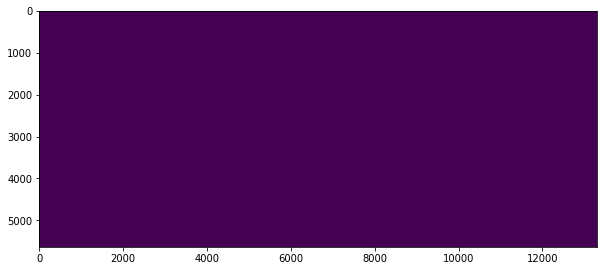

In [117]:
# Load the DEM and read out a np array of the elevation values (meters):
print(sl_file)
dem = rio.open(sl_file)
elev = dem.read(1)
print(elev)


# Plot this elevation band:
plt.figure(figsize=(10,10))
plt.imshow(elev)

title_text = ''
plt.title(title_text);

In [118]:
!gdalinfo {sl_file}

Driver: VRT/Virtual Raster
Files: /home/ubuntu/veg-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20190705_182425_0f28_3B_AnalyticMS_SR/preds/20190705_182425_0f28_3B_AnalyticMS_SR_merged_crop.vrt
Size is 13312, 5630
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (-119.553222656250000,37.822802433527563)
Pixel Size = (0.000021457672119,-0.000016966586733)
Corner Coordinates:
Upper Left  (-119.5532227,  37.8228024) 

In [119]:
!gdalinfo {preds_file}

Driver: GTiff/GeoTIFF
Files: /home/ubuntu/veg-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20190705_182425_0f28_3B_AnalyticMS_SR/preds/20190705_182425_0f28_3B_AnalyticMS_SR_merged.tif
Size is 13312, 5631
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    USAGE[
        SCOPE["unknown"],
        AREA["World"],
        BBOX[-90,-180,90,180]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (-119.553222656250000,37.822802433527563)
Pixel Size = (0.00002145767211

In [110]:
pred_data= rio.open(preds_file).read(1).flatten()

In [111]:
pred_data = pred_data[np.where(pred_data != 9999)]

In [112]:
mask_data= rio.open(mask_file).read(1).flatten()

In [113]:
mask_data = mask_data[np.where(mask_data != 9999)]

In [114]:
compute_metrics(pred_data,mask_data)

(45878272,) (45869568,)


AssertionError: Masks and predictions are different shapes. Are you sure they're in the same CRS/extent?

In [90]:
!gdalinfo {sl_file}

Driver: VRT/Virtual Raster
Files: /home/ubuntu/veg-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20190705_182425_0f28_3B_AnalyticMS_SR/preds/20190705_182425_0f28_3B_AnalyticMS_SR_merged_crop.vrt
Size is 13312, 5630
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (-119.553222656250000,37.822802433527563)
Pixel Size = (0.000021457672119,-0.000016966586733)
Corner Coordinates:
Upper Left  (-119.5532227,  37.8228024) 

In [81]:
from shapely.geometry import shape,box
from rasterio.mask import mask
with rio.open(mask_file) as src:
    with rio.open(preds_file) as origin:

        epsg4326_dem = origin.read(1)
        print('dem meta origin',origin.meta)

        print('planet origin',src.meta)
        #pf = src.read(1, masked=True)
        print(box(*src.bounds))
                
        try:
            clipped_raster,clipped_transform = mask(origin,[box(*src.bounds)],crop=True,nodata= 0)
            clipped_meta = origin.meta.copy()
            clipped_meta.update({"driver": "GTiff",
                     "height": clipped_raster.shape[1],
                     "width": clipped_raster.shape[2],
                               "nodata": 0,
                     "transform": clipped_transform}) 
            with rio.open("pred.masked1" + ".tif", "w", **clipped_meta) as dest:
                    dest.write(clipped_raster)
        except ValueError as err:
            print('Handling run-time error:', err)

dem meta origin {'driver': 'GTiff', 'dtype': 'int16', 'nodata': 9999.0, 'width': 13312, 'height': 5631, 'count': 1, 'crs': CRS.from_dict(init='epsg:4326'), 'transform': Affine(2.1457672119140625e-05, 0.0, -119.55322265625,
       0.0, -1.6962603054657133e-05, 37.82280243352756)}
planet origin {'driver': 'GTiff', 'dtype': 'int16', 'nodata': 9999.0, 'width': 13312, 'height': 5630, 'count': 1, 'crs': CRS.from_dict(init='epsg:4326'), 'transform': Affine(2.1457672119140625e-05, 0.0, -119.55322265625,
       0.0, -1.6966586732794497e-05, 37.82280243352756)}
POLYGON ((-119.267578125 37.72728055022193, -119.267578125 37.82280243352756, -119.55322265625 37.82280243352756, -119.55322265625 37.72728055022193, -119.267578125 37.72728055022193))


In [80]:
print(**clipped_meta)

TypeError: print() takes at most 4 arguments (8 given)

In [82]:
pred_data= rio.open('pred.masked1.tif').read(1).flatten()

In [83]:
pred_data = pred_data[np.where(pred_data != 9999)]

In [84]:
pred_data.shape

(74959872,)

In [85]:
!gdalinfo pred.masked1.tif

Driver: GTiff/GeoTIFF
Files: pred.masked1.tif
Size is 13312, 5631
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    USAGE[
        SCOPE["unknown"],
        AREA["World"],
        BBOX[-90,-180,90,180]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (-119.553222656250000,37.822802433527563)
Pixel Size = (0.000021457672119,-0.000016962603055)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (-119.5532227,  37.8228024) (119d33'11.60"W, 37d49'22.09"N)
Lower Lef

In [74]:
mask_data= rio.open(mask_file).read(1).flatten()

In [75]:
mask_data = mask_data[np.where(mask_data != 9999)]

In [76]:
mask_data.shape

(45869568,)

In [3]:
s3 = boto3.resource('s3')
s3_client = boto3.client('s3')

In [5]:
#planet-snowcover-snow/ASO_3M_SD_USCATE_20190705_4326_binary/15/5492/12642.tif

# These define the bucket and object to read
bucketname = 'planet-snowcover-snow'
file_to_read = 'ASO_3M_SD_USCATE_20190705_4326_binary/15/5492/12642.tif' 

#Create a file object using the bucket and object key. 
fileobj = s3_client.get_object(
    Bucket=bucketname,
    Key=file_to_read
    ) 
# open the file object and read it into the variable filedata. 
filedata = fileobj['Body'].read()




{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 512, 'height': 512, 'count': 1, 'crs': CRS.from_dict(init='epsg:4326'), 'transform': Affine(2.1457672119140625e-05, 0.0, -119.6630859375,
       0.0, -1.6914750764901454e-05, 37.97884504049711)}


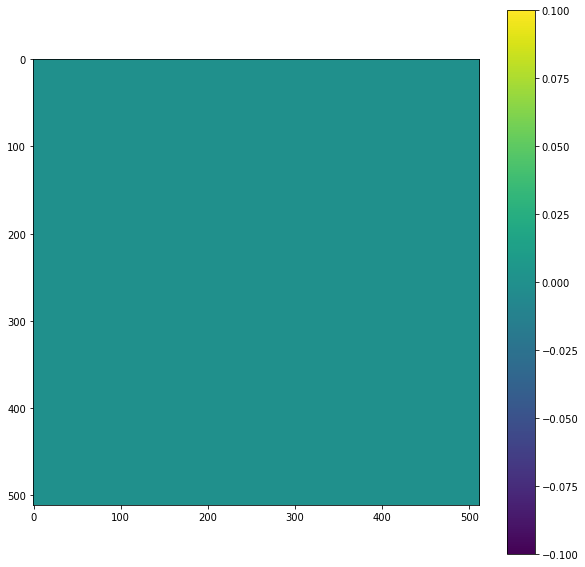

In [8]:
# Open the DEM raster already in  epsg4326
%matplotlib inline
import rasterio as rio
import numpy as np
from matplotlib import pyplot as plt
import rasterio.plot
import os
from datetime import datetime as dt

# Load the DEM and read out a np array of the elevation values (meters):
dem = rio.open('s3://planet-snowcover-snow/ASO_3M_SD_USCATE_20190705_4326_binary/15/5492/12642.tif')
elev = dem.read(2)
print(dem.meta)
# Plot this reprojected  elevation band:
plt.figure(figsize=(10,10))
plt.imshow(elev)
plt.colorbar()
title_text = ''
plt.title(title_text);


In [4]:
s3 = boto3.resource('s3')
s3_client = boto3.client('s3')
# These define the bucket and object to read
bucketname = 'planet-snowcover-experiments'
file_to_read = 'planet-snowcover-2020-03-12-02-43-15-610/test_ids.txt' 

#Create a file object using the bucket and object key. 
fileobj = s3_client.get_object(
    Bucket=bucketname,
    Key=file_to_read
    ) 
# open the file object and read it into the variable filedata. 
filedata = fileobj['Body'].read()

# file data will be a binary stream.  We have to decode it 
contents = filedata.decode('utf-8') 

# Once decoded, you can treat the file as plain text if appropriate 
#print(contents)

In [5]:
s3 = boto3.resource('s3')
s3_client = boto3.client('s3')
# These define the bucket and object to read
bucketname = 'planet-snowcover-experiments'
file_to_read = 'planet-snowcover-2020-03-06-21-21-30-038/test_ids.txt' 

#Create a file object using the bucket and object key. 
fileobj = s3_client.get_object(
    Bucket=bucketname,
    Key=file_to_read
    ) 
# open the file object and read it into the variable filedata. 
filedata = fileobj['Body'].read()

# file data will be a binary stream.  We have to decode it 
contents = filedata.decode('utf-8') 

# Once decoded, you can treat the file as plain text if appropriate 
#print(contents)